#Импортируем необходимые библиотеки (Import the necessary libs)

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

#Загрузим датасет (Load dataframe)

In [63]:
df = pd.read_excel("2kmeans_after_deleting_artifacts_in_excel.xlsx")

Выведем первые пять его элементов (Show the first five elements of dataframe):

In [64]:
df.head()

Object  First  Second  Third  Fourth
0       1     18      19     22      55
1       2     17      16     26      56
2       3     15      12     38      57
3       4     16      11     32      57
4       5     19      17     24      57

#Основной ход работы (Main job)

Написанный класс кластеризатора, который отвечает за все происходящее в программе (Self written clusterizator class - center of program):

In [65]:
'''
Класс кластеризатора
Назначение: рисование кластеров и их центров, обучение модели К-средних

Translate:
Clusterizator class
Destination: drawing clusters and it's centers, fitting KMeans model
'''
class Clusterizator(object):
  '''
  Метод-конструктор
  Параметры: модель К-средних, датасет
  Возвращает: ничего

  Translate:
  Constructor method
  Params:
    KMeans: KMeans - model
    df: pd.DataFrame - dataset/dataframe
  Returns:
    None - nothing to return
  '''
  def __init__(self, model: KMeans, df: pd.DataFrame) -> None:
    self.model = model
    self.df = df

  '''
  Метод обучения модели
  Параметры: нет
  Возвращает: список

  Translate:
  fit method
  Params:
    None - no params at method signature
  Returns:
    predicts: list - fitted model and predicting
  '''
  def fit(self) -> list:
    predicts = self.model.fit_predict(self.df)
    return predicts

  '''
  Метод перевода элементов одного из центров кластеров к целочисленному типу
  Параметры: список - один элемент из списка центров кластеров
  Возвращает: список целочисленных элементов одного из центра кластеров

  Translate:
  center_integers method
  Params:
    center: list - one of centers of clusters
  Returns:
    center: list - one of centers of clusters with integer values
  '''
  def center_integers(self, center: list) -> list:
    for i in range(len(center)):
      center[i] = int(center[i])
    return center

  '''
  Метод установки кластеров и их выявления
  Параметры: нет
  Возвращает: двумерный список

  Translate:
  set_labels method
  Params
    None - no params at method signature
  Returns: 
    clusters: list of list
  '''
  def set_labels(self) -> list:
    self.label = self.fit()
    clusters = list()
    for i in range(len(np.unique(self.label))):
      clusters.append(df[self.label == i])  
    return clusters  

  '''
  Метод установки центров кластеров и их выявления
  Параметры: нет
  Возвращает: двумерный список

  Translate:
  set_centers method
  Params
    None - no params at method signature
  Returns:
    centers: list of list
  '''
  def set_centers(self) -> list:
    centers = list()
    for i in range(len(np.unique(self.label))):
      centers.append(self.center_integers(self.model.cluster_centers_[i]))
    return centers  

  '''
  Метод ожидания отображения кластеров с центрами
  Параметры: кластер, центр (одни из всех кластеров)
  Возвращает: ничего

  Translate:
  scatter_function method
  Params
    cluster: list
    center: list
  Returns:
    None - nothing to return
  '''
  def scatter_function(self, cluster: list, center: list) -> None:
    cols = df.columns
    plt.scatter(cluster[cols[0]], cluster[cols[1]], cluster[cols[2]])    
    plt.scatter([center[0], center[0]], [center[1], center[1]], color='black')

  '''
  Метод с основным циклом программы
  Параметры: количество кластеров, кластеры, центры кластеров
  Возвращает: ничего

  Translate:
  main_cycle_function method
  Params:
    clusters_count: int
    clusters: list
    centers: list
  Returns:
    None - nothing to return 
  '''
  def main_cycle_function(self, clusters_count, clusters, centers) -> None:
    for i in range(clusters_count):
      self.scatter_function(self.clusters[i], centers[i])
    plt.show()  

  '''
  Метод рисования кластеров
  Параметры: нет
  Возвращает: ничего

  Translate:
  draw_clusters method
  Params:
    None - no params at method signature
  Returns:
    None - nothing to return
  '''
  def draw_clusters(self) -> None:
    self.clusters = self.set_labels()
    self.centers = self.set_centers()
    self.main_cycle_function(len(self.model.cluster_centers_), self.clusters, self.centers)

Добавим основную функцию (Add main function):

In [66]:
'''
Главная функция, в которой происходят все вызовы
Параметры: нет
Возвращает: ничего

Translate:
main function
Params:
  None - no params at method signature
Returns:
  None - nothing to return
'''
def main() -> None:
  clusterizator = Clusterizator(KMeans(n_clusters=4), df)
  clusterizator.draw_clusters()

Выведем результат работы программы на экран (Let's show program's output):

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


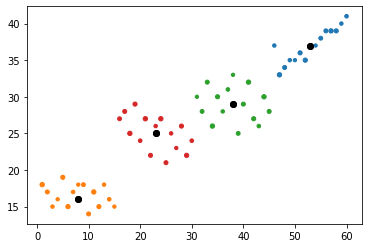

In [67]:
if __name__ == "__main__":
  main()

#Формирование массива предсказаний

In [68]:
'''
Главная функция, в которой происходят все вызовы
Параметры: нет
Возвращает: ничего

Translate:
main function
Params:
  None - no params at method signature
Returns:
  final_df: pd.DataFrame - df with predictions
'''
def main() -> pd.DataFrame:
  model = KMeans(n_clusters=4)
  y = model.fit_predict(df)
  target_df = pd.DataFrame({ "Predictions": y.T })
  final_df = pd.concat([df, target_df], axis=1)
  return final_df


if __name__ == "__main__":
  global final_df
  final_df = main()
  df.to_excel("3kmeans_before_clustering.xlsx")
  final_df.to_excel("4kmeans_with_predictions.xlsx")


final_df.head()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Object  First  Second  Third  Fourth  Predictions
0       1     18      19     22      55            1
1       2     17      16     26      56            1
2       3     15      12     38      57            1
3       4     16      11     32      57            1
4       5     19      17     24      57            1